# Kaggle dataset for bestsellers in Amazon

In [66]:
import pandas as pd
df = pd.read_csv("./bestsellers.csv") 

In [67]:
df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,5000 Awesome Facts (About Everything!) (Nation...,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [73]:
#removing duplicates
df1=df
i=0
for value in df1.duplicated(subset='Name', keep='first'): 
    if value == True:
        df1 =  df1.drop([i])
        i+=1
    else:
        i+=1

In [74]:
df1

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,5000 Awesome Facts (About Everything!) (Nation...,National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction


In [75]:
df1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
538    False
539    False
540    False
545    False
546    False
Length: 349, dtype: bool

In [76]:
# removing collumns that I don't need
df2 = df1.drop(['Author','Reviews'],axis=1)
df2

,Name,User Rating,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,4.7,8,2016,Non Fiction
1,11/22/63: A Novel,4.6,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,4.7,15,2018,Non Fiction
3,1984 (Signet Classics),4.7,6,2017,Fiction
4,5000 Awesome Facts (About Everything!) (Nation...,4.8,12,2019,Non Fiction
...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,4.5,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,4.2,11,2010,Non Fiction
540,Wonder,4.8,9,2013,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),4.9,8,2019,Fiction


In [77]:
df2.dtypes

Name            object
User Rating    float64
Price            int64
Year             int64
Genre           object
dtype: object

In [78]:
df3=df2
df4 = df3.sort_values(by='User Rating', ascending=False)
df4

,Name,User Rating,Price,Year,Genre
82,Dog Man: A Tale of Two Kitties: From the Creat...,4.9,8,2017,Fiction
174,Humans of New York : Stories,4.9,17,2015,Non Fiction
146,Goodnight,4.9,7,2012,Fiction
289,Rush Revere and the First Patriots: Time-Trave...,4.9,12,2014,Fiction
40,Brown Bear,4.9,5,2017,Fiction
...,...,...,...,...,...
392,The Goldfinch: A Novel (Pulitzer Prize for Fic...,3.9,20,2013,Fiction
22,Allegiant,3.9,13,2013,Fiction
106,Fifty Shades of Grey: Book One of the Fifty Sh...,3.8,14,2012,Fiction
132,Go Set a Watchman: A Novel,3.6,19,2015,Fiction


In [79]:
df4.isnull().values.any()

False

In [80]:
#is it possible given a genre/year, to predict the user rating?
y = df4['User Rating']
df5 = df4
df5["Genre"]= df5["Genre"].str.replace("Non Fiction", "1")
df5["Genre"]= df5["Genre"].str.replace("Fiction", "0")

# now fiction is 0 and non fiction is 1 

x = df5.drop(['User Rating','Name',"Price"],axis=1)

pd.reset_option("max_rows")
print(y)
print(x)

82     4.9
174    4.9
146    4.9
289    4.9
40     4.9
      ... 
392    3.9
22     3.9
106    3.8
132    3.6
353    3.3
Name: User Rating, Length: 349, dtype: float64
     Year Genre
82   2017     0
174  2015     1
146  2012     0
289  2014     0
40   2017     0
..    ...   ...
392  2013     0
22   2013     0
106  2012     0
132  2015     0
353  2012     0

[349 rows x 2 columns]


In [81]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x,y)
predictions = model.predict([[ 2012,0], [2010,0]])
predictions

array([4.44375   , 4.60588235])

In [82]:
# this prediction is telling me that people that like non fiction books
# have a preference for books that were published in 2010 
# rather than the ones from 2012

In [83]:
predictions = model.predict([[ 2012,0], [2012,1]])
predictions

array([4.44375   , 4.53333333])

In [84]:
# this prediction tells me that people liked more fiction books from 2012 
# than the non fiction ones
predictions = model.predict([[2014,0], [2013,0], [2012,0], [2011,0], [2010,0], [2009,0]])
predictions

array([4.65882353, 4.57647059, 4.44375   , 4.58571429, 4.60588235,
       4.59166667])

In [17]:
from sklearn import tree

[Text(167.4, 201.90857142857143, 'X[0] <= 2013.5\nmse = 0.051\nsamples = 550\nvalue = 4.618'),
 Text(80.81379310344828, 170.84571428571428, 'X[1] <= 0.5\nmse = 0.056\nsamples = 250\nvalue = 4.557'),
 Text(46.179310344827584, 139.78285714285715, 'X[0] <= 2011.5\nmse = 0.08\nsamples = 110\nvalue = 4.573'),
 Text(23.089655172413792, 108.72, 'X[0] <= 2009.5\nmse = 0.039\nsamples = 65\nvalue = 4.608'),
 Text(11.544827586206896, 77.65714285714284, 'mse = 0.048\nsamples = 24\nvalue = 4.592'),
 Text(34.63448275862069, 77.65714285714284, 'X[0] <= 2010.5\nmse = 0.034\nsamples = 41\nvalue = 4.617'),
 Text(23.089655172413792, 46.59428571428572, 'mse = 0.038\nsamples = 20\nvalue = 4.615'),
 Text(46.179310344827584, 46.59428571428572, 'mse = 0.03\nsamples = 21\nvalue = 4.619'),
 Text(69.26896551724138, 108.72, 'X[0] <= 2012.5\nmse = 0.134\nsamples = 45\nvalue = 4.522'),
 Text(57.72413793103448, 77.65714285714284, 'mse = 0.143\nsamples = 21\nvalue = 4.495'),
 Text(80.81379310344828, 77.65714285714284

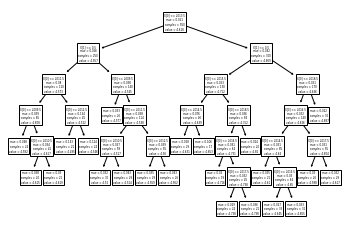

In [18]:
tree.plot_tree(model)

In [19]:
data = {'Year':  x['Year'],
        'Genre': x['Genre'],
        'User Rating': y}

df15 = pd.DataFrame (data, columns = ['Year','Genre','User Rating'])

print (df15)

     Year Genre  User Rating
431  2016     1          4.9
87   2018     0          4.9
85   2019     0          4.9
84   2019     0          4.9
83   2018     0          4.9
..    ...   ...          ...
22   2013     0          3.9
107  2013     0          3.8
106  2012     0          3.8
132  2015     0          3.6
353  2012     0          3.3

[550 rows x 3 columns]


In [48]:
import graphviz
dot_data = df15
dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("bestsellers")
graph.view()

#the mse is tiny.

#decision tree model can be seen on a pdf file (bestsellers.pdf).

'bestsellers.pdf'

In [91]:
# is it possible to predict what kind of book will sell more? fiction or non fiction?

predictions_fiction = model.predict([[2010,0], [2011,0], [2012,0], [2013,0], [2014,0], [2015,0],[2016,0],[2017,0],[2018,0],[2019,0]])
predictions_nonfiction = model.predict([[2010,1], [2011,1], [2012,1], [2013,1], [2014,1], [2015,1],[2016,1],[2017,1],[2018,1],[2019,1]])

In [111]:
print(predictions_fiction)
print(predictions_nonfiction)

year =[]
year =['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
lpf= list(predictions_fiction)
lpnf= list(predictions_nonfiction)

len(year)

[4.60588235 4.58571429 4.44375    4.57647059 4.65882353 4.52222222
 4.7        4.70666667 4.69090909 4.78888889]
[4.53913043 4.48823529 4.53333333 4.6        4.63       4.66666667
 4.7125     4.59166667 4.62222222 4.7       ]


10

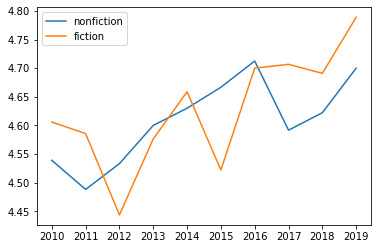

In [120]:
fig, ax = plt.subplots() 
ax.plot(year,lpnf,label='nonfiction')
ax.plot(year,lpf,label='fiction')
ax.legend()


In [ ]:
# It must be safe to assume that for fiction books the curve has ups and downs with increasingly values. 
# While the gap for non fiction between peaks is larger.
# that means fiction books published within the last ~10 years had a user rating of ~~4.45 min and max of ~~4.8.
# for non fiction a min ~~4.4 and a max ~~4.7. That tells us two things:
# - fiction books are more popular than non fiction ones
# - non fiction books public is a safer investment